**So, we are trying to predict the price of a newly launched smartphone or iphone with help of featurs such as specification , SPEC Rating and user rating . So we can compare it with actual price and find out whether it is fair to pay that amount of money to producers or not.**

# **Feature Engineering.**

In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.set_option('display.max_rows', None)

**Reading cleaned Data**

In [0]:
df= pd.read_csv('modify.csv')
data=df.copy()
data.head()

,Unnamed: 0,pid,score-val,name,price,rating,Brand,Processor(GHz),Processor,Core,RAM(GB),Memory(GB),Battery,Screen_size(inches),Display,Memory_card_supported,Android-v,Processor_brand,Front_cam_1,Front_cam_2,Dual Sim,3G,4G,VoLTE,Wi-Fi,IR Blaster,Single Sim,5G,NFC,HDMI,Quad Sim,Triple Sim,Quad_cam,Single_cam,Triple_cam,Dual_cam,Penta_cam
0,0,pd18nrbx50l,80,Xiaomi Redmi Note 9 Pro Max,9.711055,1.4,Xiaomi,2.3,Snapdragon 720G,Octa Core,6.0,64.0,8.521185,6.67,1080 x 2400 px Display with Punch Hole,512.0,Android v10.0,Snapdragon,32.0,0.0,1,1,1,1,1,1,0,0,0,0,0,0,64,0.0,0,0.0,0
1,1,pd1avaexqac,76,Xiaomi Redmi Note 9 Pro,9.546741,NaN,Xiaomi,2.3,Snapdragon 720G,Octa Core,4.0,64.0,8.521185,6.67,1080 x 2400 px Display with Punch Hole,512.0,Android v10.0,Snapdragon,16.0,0.0,1,1,1,1,1,1,0,0,0,0,0,0,48,0.0,0,0.0,0
2,2,pd1xq857m1x,74,Realme Narzo 10,9.392579,0.7,Realme,2.0,Helio G80,Octa Core,4.0,128.0,8.517193,6.50,720 x 1600 px Display with Water Drop Notch,256.0,Android v10,Helio,16.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0,48,0.0,0,0.0,0
3,3,pd1sbe530da,80,Samsung Galaxy M31,9.680281,1.4,Samsung,2.3,Exynos 9611,Octa Core,6.0,64.0,8.699515,6.40,1080 x 2340 px Display with Water Drop Notch,512.0,Android v10.0,Exynos,32.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0,64,0.0,0,0.0,0
4,4,pd1dj4jnzb4,76,Samsung Galaxy M21,9.449279,1.4,Samsung,2.3,Exynos 9611,Octa Core,4.0,64.0,8.699515,6.40,1080 x 2340 px Display with Water Drop Notch,512.0,Android v10.0,Exynos,20.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0.0,48,0.0,0


**Some data type conversions.**

In [0]:
def handling_dtype(data):
	data['3G']=data['3G'].astype(str)
	data['4G']=data['4G'].astype(str)
	data['5G']=data['5G'].astype(str)
	data['VoLTE']=data['VoLTE'].astype(str)
	data['Wi-Fi']=data['Wi-Fi'].astype(str)
	data['IR Blaster']=data['IR Blaster'].astype(str)
	data['HDMI']=data['HDMI'].astype(str)
	data['Quad Sim']=data['Quad Sim'].astype(str)
	data['Triple Sim']=data['Triple Sim'].astype(str)
	data['Single Sim']=data['Single Sim'].astype(str)
	data['Dual Sim']=data['Dual Sim'].astype(str)
	data['NFC']=data['NFC'].astype(str)

	data['Front_cam_2'][data['Front_cam_2']=="[' 8  ', ' TOF 3D Dual Front Camera']"]=data['Front_cam_2'].mode()
	data['Front_cam_2']=data['Front_cam_2'].astype(float)

	data['Front_cam_1']=data['Front_cam_1'].astype(str)
	data['Front_cam_1']=data['Front_cam_1'].apply(lambda x:x.replace(' ','').replace("'",'').replace('[','').split(',')[0] if '[' in x else x )
	data['Front_cam_1']=data['Front_cam_1'].astype(float)
	data['Front_cam_1'].unique()

	data['Single_cam'][data['Single_cam']=='No']=data['Single_cam'].mode()
	data['Single_cam']=data['Single_cam'].astype(float)


In [0]:
handling_dtype(data)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2000 non-null   int64  
 1   pid                    2000 non-null   object 
 2   score-val              2000 non-null   int64  
 3   name                   2000 non-null   object 
 4   price                  2000 non-null   float64
 5   rating                 1675 non-null   float64
 6   Brand                  2000 non-null   object 
 7   Processor(GHz)         1532 non-null   float64
 8   Processor              1536 non-null   object 
 9   Core                   1536 non-null   object 
 10  RAM(GB)                1836 non-null   float64
 11  Memory(GB)             1897 non-null   float64
 12  Battery                1856 non-null   float64
 13  Screen_size(inches)    1906 non-null   float64
 14  Display                1906 non-null   object 
 15  Memo

In [0]:
data.head()

,Unnamed: 0,pid,score-val,name,price,rating,Brand,Processor(GHz),Processor,Core,RAM(GB),Memory(GB),Battery,Screen_size(inches),Display,Memory_card_supported,Android-v,Processor_brand,Front_cam_1,Front_cam_2,Dual Sim,3G,4G,VoLTE,Wi-Fi,IR Blaster,Single Sim,5G,NFC,HDMI,Quad Sim,Triple Sim,Quad_cam,Single_cam,Triple_cam,Dual_cam,Penta_cam
0,0,pd18nrbx50l,80,Xiaomi Redmi Note 9 Pro Max,9.711055,1.4,Xiaomi,2.3,Snapdragon 720G,Octa Core,6.0,64.0,8.521185,6.67,1080 x 2400 px Display with Punch Hole,512.0,Android v10.0,Snapdragon,32.0,0.0,1,1,1,1,1,1,0,0,0,0,0,0,64,0.0,0,0.0,0
1,1,pd1avaexqac,76,Xiaomi Redmi Note 9 Pro,9.546741,NaN,Xiaomi,2.3,Snapdragon 720G,Octa Core,4.0,64.0,8.521185,6.67,1080 x 2400 px Display with Punch Hole,512.0,Android v10.0,Snapdragon,16.0,0.0,1,1,1,1,1,1,0,0,0,0,0,0,48,0.0,0,0.0,0
2,2,pd1xq857m1x,74,Realme Narzo 10,9.392579,0.7,Realme,2.0,Helio G80,Octa Core,4.0,128.0,8.517193,6.50,720 x 1600 px Display with Water Drop Notch,256.0,Android v10,Helio,16.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0,48,0.0,0,0.0,0
3,3,pd1sbe530da,80,Samsung Galaxy M31,9.680281,1.4,Samsung,2.3,Exynos 9611,Octa Core,6.0,64.0,8.699515,6.40,1080 x 2340 px Display with Water Drop Notch,512.0,Android v10.0,Exynos,32.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0,64,0.0,0,0.0,0
4,4,pd1dj4jnzb4,76,Samsung Galaxy M21,9.449279,1.4,Samsung,2.3,Exynos 9611,Octa Core,4.0,64.0,8.699515,6.40,1080 x 2340 px Display with Water Drop Notch,512.0,Android v10.0,Exynos,20.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0.0,48,0.0,0


**Dropping rows which have null price value(beacuse it is our dependable varibale).**

In [0]:
data.dropna(subset=['price'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1675 entries, 0 to 1999
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1675 non-null   int64  
 1   pid                    1675 non-null   object 
 2   score-val              1675 non-null   int64  
 3   name                   1675 non-null   object 
 4   price                  1675 non-null   float64
 5   rating                 1675 non-null   float64
 6   Brand                  1675 non-null   object 
 7   Processor(GHz)         1289 non-null   float64
 8   Processor              1292 non-null   object 
 9   Core                   1292 non-null   object 
 10  RAM(GB)                1540 non-null   float64
 11  Memory(GB)             1589 non-null   float64
 12  Battery                1555 non-null   float64
 13  Screen_size(inches)    1595 non-null   float64
 14  Display                1592 non-null   object 
 15  Memo

In [0]:
features=[feature for feature in data.columns]

In [0]:
numeric_feature = [feature for feature in features if data[feature].dtypes!='O']
numeric_feature

['Unnamed: 0',
 'score-val',
 'price',
 'rating',
 'Processor(GHz)',
 'RAM(GB)',
 'Memory(GB)',
 'Battery',
 'Screen_size(inches)',
 'Memory_card_supported',
 'Front_cam_1',
 'Front_cam_2',
 'Quad_cam',
 'Single_cam',
 'Triple_cam',
 'Dual_cam',
 'Penta_cam']

In [0]:
categorical_features=[feature for feature in data.columns if data[feature].dtype =='O']
categorical_features= list(set(categorical_features)-set(['pid']))
categorical_features

['IR Blaster',
 'Brand',
 'Triple Sim',
 '4G',
 'Core',
 'Wi-Fi',
 'NFC',
 '3G',
 'Android-v',
 'Processor',
 '5G',
 'Dual Sim',
 'HDMI',
 'VoLTE',
 'Quad Sim',
 'Display',
 'name',
 'Single Sim',
 'Processor_brand']

**Handling missing values in both numerical as well as categorical features.**

In [0]:
for feature in numeric_feature:
  nan = data[feature].median()
  data[feature].fillna(nan, inplace=True)

for feature in categorical_features:
  nan = data[feature].mode()[0]
  data[feature].fillna(nan, inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1675 entries, 0 to 1999
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1675 non-null   int64  
 1   pid                    1675 non-null   object 
 2   score-val              1675 non-null   int64  
 3   name                   1675 non-null   object 
 4   price                  1675 non-null   float64
 5   rating                 1675 non-null   float64
 6   Brand                  1675 non-null   object 
 7   Processor(GHz)         1675 non-null   float64
 8   Processor              1292 non-null   object 
 9   Core                   1292 non-null   object 
 10  RAM(GB)                1675 non-null   float64
 11  Memory(GB)             1675 non-null   float64
 12  Battery                1675 non-null   float64
 13  Screen_size(inches)    1675 non-null   float64
 14  Display                1592 non-null   object 
 15  Memo

**Handling Categorical features as it requires to convert into some form before feeding into the model as i'm going for simply converting into numerical variable instead of converting into one hot encdoing or using label encoder library.**

In [0]:
for feature in categorical_features:
    labels_ordered=data.groupby([feature])['price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    data[feature]=data[feature].map(labels_ordered)
    
data.head()

,Unnamed: 0,pid,score-val,name,price,rating,Brand,Processor(GHz),Processor,Core,RAM(GB),Memory(GB),Battery,Screen_size(inches),Display,Memory_card_supported,Android-v,Processor_brand,Front_cam_1,Front_cam_2,Dual Sim,3G,4G,VoLTE,Wi-Fi,IR Blaster,Single Sim,5G,NFC,HDMI,Quad Sim,Triple Sim,Quad_cam,Single_cam,Triple_cam,Dual_cam,Penta_cam
0,0,pd18nrbx50l,80,994,9.711055,1.4,139,2.3,200,3,6.0,64.0,8.521185,6.67,137,512.0,31,15,32.0,0.0,0,1,1,1,1,1,0,0,0,0,0,1,64,0.0,0,0.0,0
2,2,pd1xq857m1x,74,802,9.392579,0.7,129,2.0,135,3,4.0,128.0,8.517193,6.50,94,256.0,29,23,16.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,48,0.0,0,0.0,0
3,3,pd1sbe530da,80,980,9.680281,1.4,148,2.3,186,3,6.0,64.0,8.699515,6.40,71,512.0,31,34,32.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,64,0.0,0,0.0,0
4,4,pd1dj4jnzb4,76,816,9.449279,1.4,148,2.3,186,3,4.0,64.0,8.699515,6.40,71,512.0,31,34,20.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,0,0.0,48,0.0,0
5,5,pd1f4dycqja,58,270,8.160232,1.0,129,2.0,0,3,3.0,32.0,8.294050,6.10,39,128.0,12,23,5.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,0,0.0,0,13.0,0


**Shuffling dataset**

In [0]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Unnamed: 0,pid,score-val,name,price,rating,Brand,Processor(GHz),Processor,Core,RAM(GB),Memory(GB),Battery,Screen_size(inches),Display,Memory_card_supported,Android-v,Processor_brand,Front_cam_1,Front_cam_2,Dual Sim,3G,4G,VoLTE,Wi-Fi,IR Blaster,Single Sim,5G,NFC,HDMI,Quad Sim,Triple Sim,Quad_cam,Single_cam,Triple_cam,Dual_cam,Penta_cam
0,1334,pd15ehx2duf,58,716,9.234350,1.20,117,1.5,116,3,4.0,64.0,8.612503,5.50,64,128.0,25,21,5.0,0.0,0,1,1,0,1,0,0,0,0,0,0,1,0,0.0,0,13.0,0
1,899,pd1sji33jp1,70,992,9.698920,1.30,135,2.2,198,3,6.0,64.0,8.089482,6.30,120,256.0,19,15,16.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,0,0.0,0,13.0,0
2,335,pd1yngr94v5,62,535,8.987072,1.45,108,1.8,85,3,2.0,32.0,8.517193,6.60,87,256.0,31,23,8.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,16,0.0,0,0.0,0
3,1549,pd1pe6eo9bp,49,291,8.255569,1.65,42,2.2,0,3,2.0,16.0,8.006368,5.72,66,256.0,11,15,2.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,0,5.0,0,0.0,0
4,1759,pd1rw21r4kg,56,635,9.104869,1.15,109,1.5,93,1,3.0,32.0,8.268732,6.26,80,256.0,12,17,5.0,0.0,0,1,1,0,1,0,0,0,0,0,0,1,0,13.0,0,0.0,0


**Creating seperate train and test dataset.**

In [0]:
train_data=data[:1500]
#train_data=data.copy()
test_data=data[1500:]

In [0]:
orig_df=data[['pid','price']][1500:]
orig_df.head()

,pid,price
1500,pd1f0p40yab,9.209340
1501,pd10fvlv1rp,10.596385
1502,pd1fkv196pu,6.445720
1503,pd1x4weiur8,7.214504
1504,pd15cfwrcy1,9.392579


In [0]:
train_data.drop(['Unnamed: 0','name','pid'],inplace=True,axis=1)
train_data.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,score-val,price,rating,Brand,Processor(GHz),Processor,Core,RAM(GB),Memory(GB),Battery,Screen_size(inches),Display,Memory_card_supported,Android-v,Processor_brand,Front_cam_1,Front_cam_2,Dual Sim,3G,4G,VoLTE,Wi-Fi,IR Blaster,Single Sim,5G,NFC,HDMI,Quad Sim,Triple Sim,Quad_cam,Single_cam,Triple_cam,Dual_cam,Penta_cam
0,58,9.234350,1.20,117,1.5,116,3,4.0,64.0,8.612503,5.50,64,128.0,25,21,5.0,0.0,0,1,1,0,1,0,0,0,0,0,0,1,0,0.0,0,13.0,0
1,70,9.698920,1.30,135,2.2,198,3,6.0,64.0,8.089482,6.30,120,256.0,19,15,16.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,0,0.0,0,13.0,0
2,62,8.987072,1.45,108,1.8,85,3,2.0,32.0,8.517193,6.60,87,256.0,31,23,8.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,16,0.0,0,0.0,0
3,49,8.255569,1.65,42,2.2,0,3,2.0,16.0,8.006368,5.72,66,256.0,11,15,2.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,0,5.0,0,0.0,0
4,56,9.104869,1.15,109,1.5,93,1,3.0,32.0,8.268732,6.26,80,256.0,12,17,5.0,0.0,0,1,1,0,1,0,0,0,0,0,0,1,0,13.0,0,0.0,0


# **Feature Selection**

**Importing lasso for feature selection.**

In [0]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [0]:
feature_scale=[feature for feature in train_data.columns ]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_data[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
train_data = pd.DataFrame(scaler.transform(train_data[feature_scale]), columns=feature_scale)
train_data.head()

,score-val,price,rating,Brand,Processor(GHz),Processor,Core,RAM(GB),Memory(GB),Battery,Screen_size(inches),Display,Memory_card_supported,Android-v,Processor_brand,Front_cam_1,Front_cam_2,Dual Sim,3G,4G,VoLTE,Wi-Fi,IR Blaster,Single Sim,5G,NFC,HDMI,Quad Sim,Triple Sim,Quad_cam,Single_cam,Triple_cam,Dual_cam,Penta_cam
0,0.577778,0.527809,0.600,0.684211,0.255102,0.374194,0.6,0.047619,0.087622,0.666941,0.675325,0.310680,0.248532,0.625,0.512195,0.112224,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.203125,0.0
1,0.711111,0.580663,0.650,0.789474,0.612245,0.638710,0.6,0.079365,0.087622,0.520017,0.779221,0.582524,0.499022,0.475,0.365854,0.362622,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.203125,0.0
2,0.622222,0.499676,0.725,0.631579,0.408163,0.274194,0.6,0.015873,0.043115,0.640167,0.818182,0.422330,0.499022,0.775,0.560976,0.180514,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.148148,0.000000,0.0,0.000000,0.0
3,0.477778,0.416452,0.825,0.245614,0.612245,0.000000,0.6,0.015873,0.020862,0.496669,0.703896,0.320388,0.499022,0.275,0.365854,0.043934,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.046296,0.0,0.000000,0.0
4,0.555556,0.513077,0.575,0.637427,0.255102,0.300000,0.2,0.031746,0.043115,0.570371,0.774026,0.388350,0.499022,0.300,0.414634,0.112224,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.120370,0.0,0.000000,0.0


In [0]:
train_data.corr()

,score-val,price,rating,Brand,Processor(GHz),Processor,Core,RAM(GB),Memory(GB),Battery,Screen_size(inches),Display,Memory_card_supported,Android-v,Processor_brand,Front_cam_1,Front_cam_2,Dual Sim,3G,4G,VoLTE,Wi-Fi,IR Blaster,Single Sim,5G,NFC,HDMI,Quad Sim,Triple Sim,Quad_cam,Single_cam,Triple_cam,Dual_cam,Penta_cam
score-val,1.000000,0.914926,0.037287,0.813565,0.311877,0.816228,0.105495,-0.375008,0.351650,0.632978,0.770096,0.769339,0.239928,0.393083,0.333610,0.376026,0.167325,-0.104277,0.831940,0.844724,0.693919,0.842605,0.181514,-0.077564,0.348697,0.466879,0.000056,-0.052760,0.083740,0.373106,-0.183149,0.336546,0.203489,0.069199
price,0.914926,1.000000,0.043949,0.846818,0.377801,0.862471,0.149175,-0.328816,0.424779,0.529419,0.673699,0.815675,0.205881,0.402230,0.348793,0.313410,0.152138,0.053140,0.745319,0.748727,0.596856,0.756791,0.145037,0.076787,0.345885,0.555043,0.025350,-0.028444,0.061324,0.282450,-0.115890,0.316918,0.172756,0.064537
rating,0.037287,0.043949,1.000000,-0.006647,0.099378,0.058739,0.013780,0.023325,0.048949,0.009854,0.022956,0.045167,-0.001091,-0.011705,-0.004315,0.029091,0.013019,-0.006755,0.011774,0.023960,0.012711,0.006964,-0.008194,-0.013750,0.025751,0.033877,-0.036075,0.007642,-0.001329,0.005880,-0.046591,0.018214,0.049939,-0.001745
Brand,0.813565,0.846818,-0.006647,1.000000,0.197116,0.728968,0.091823,-0.382523,0.260771,0.488053,0.630246,0.687440,0.304036,0.383583,0.402563,0.231540,0.090480,0.059933,0.710560,0.704869,0.592588,0.732089,0.138676,0.088248,0.211442,0.412876,0.028300,-0.034987,0.073924,0.224109,-0.113867,0.249395,0.184598,0.032599
Processor(GHz),0.311877,0.377801,0.099378,0.197116,1.000000,0.541371,0.438317,0.173746,0.511857,0.150707,0.164263,0.463354,0.150268,0.189671,0.096791,0.388496,0.135452,0.064795,-0.037495,-0.004633,0.078312,-0.038009,0.122572,0.065585,0.369509,0.480731,-0.047170,0.002387,-0.004137,0.209156,-0.153996,0.299302,0.039210,0.025580
Processor,0.816228,0.862471,0.058739,0.728968,0.541371,1.000000,0.260129,-0.142673,0.496890,0.463912,0.556702,0.801269,0.294620,0.407087,0.336888,0.465492,0.184865,0.050943,0.510039,0.543393,0.501928,0.517023,0.178801,0.073178,0.395302,0.589258,0.007395,-0.032471,0.056279,0.340565,-0.155164,0.351290,0.177241,0.068395
Core,0.105495,0.149175,0.013780,0.091823,0.438317,0.260129,1.000000,0.121835,0.266806,0.044107,0.026679,0.247093,0.133163,0.170628,0.119732,0.222186,0.048850,0.039820,-0.097493,-0.067989,0.038480,-0.098828,0.054742,0.037323,0.075880,0.205716,-0.000185,0.006207,-0.010758,0.092635,-0.097608,0.088425,0.046385,0.014832
RAM(GB),-0.375008,-0.328816,0.023325,-0.382523,0.173746,-0.142673,0.121835,1.000000,0.062752,-0.501377,-0.519670,-0.264917,-0.096044,-0.086404,-0.143478,0.115687,-0.004245,-0.029691,-0.509393,-0.504011,-0.352521,-0.551450,-0.016542,-0.056217,0.029199,-0.042712,-0.029709,-0.007978,-0.126167,0.002977,-0.146413,-0.010766,-0.097182,0.004051
Memory(GB),0.351650,0.424779,0.048949,0.260771,0.511857,0.496890,0.266806,0.062752,1.000000,0.240616,0.282832,0.438182,0.120648,0.191657,0.111579,0.378214,0.127693,0.077989,0.047881,0.080573,0.132191,0.061261,0.114763,0.085418,0.326437,0.377698,-0.047371,-0.007420,0.012861,0.227252,-0.041838,0.268047,0.009216,0.095135
Battery,0.632978,0.529419,0.009854,0.488053,0.150707,0.463912,0.044107,-0.501377,0.240616,1.000000,0.725481,0.509786,0.249772,0.261006,0.170771,0.272338,0.095473,-0.145191,0.473522,0.537169,0.440428,0.494750,0.118378,-0.148497,0.191055,0.180183,-0.034023,0.007566,0.017147,0.259697,0.008276,0.205513,0.159417,0.061359


**Visulaizing correlation Matrix**

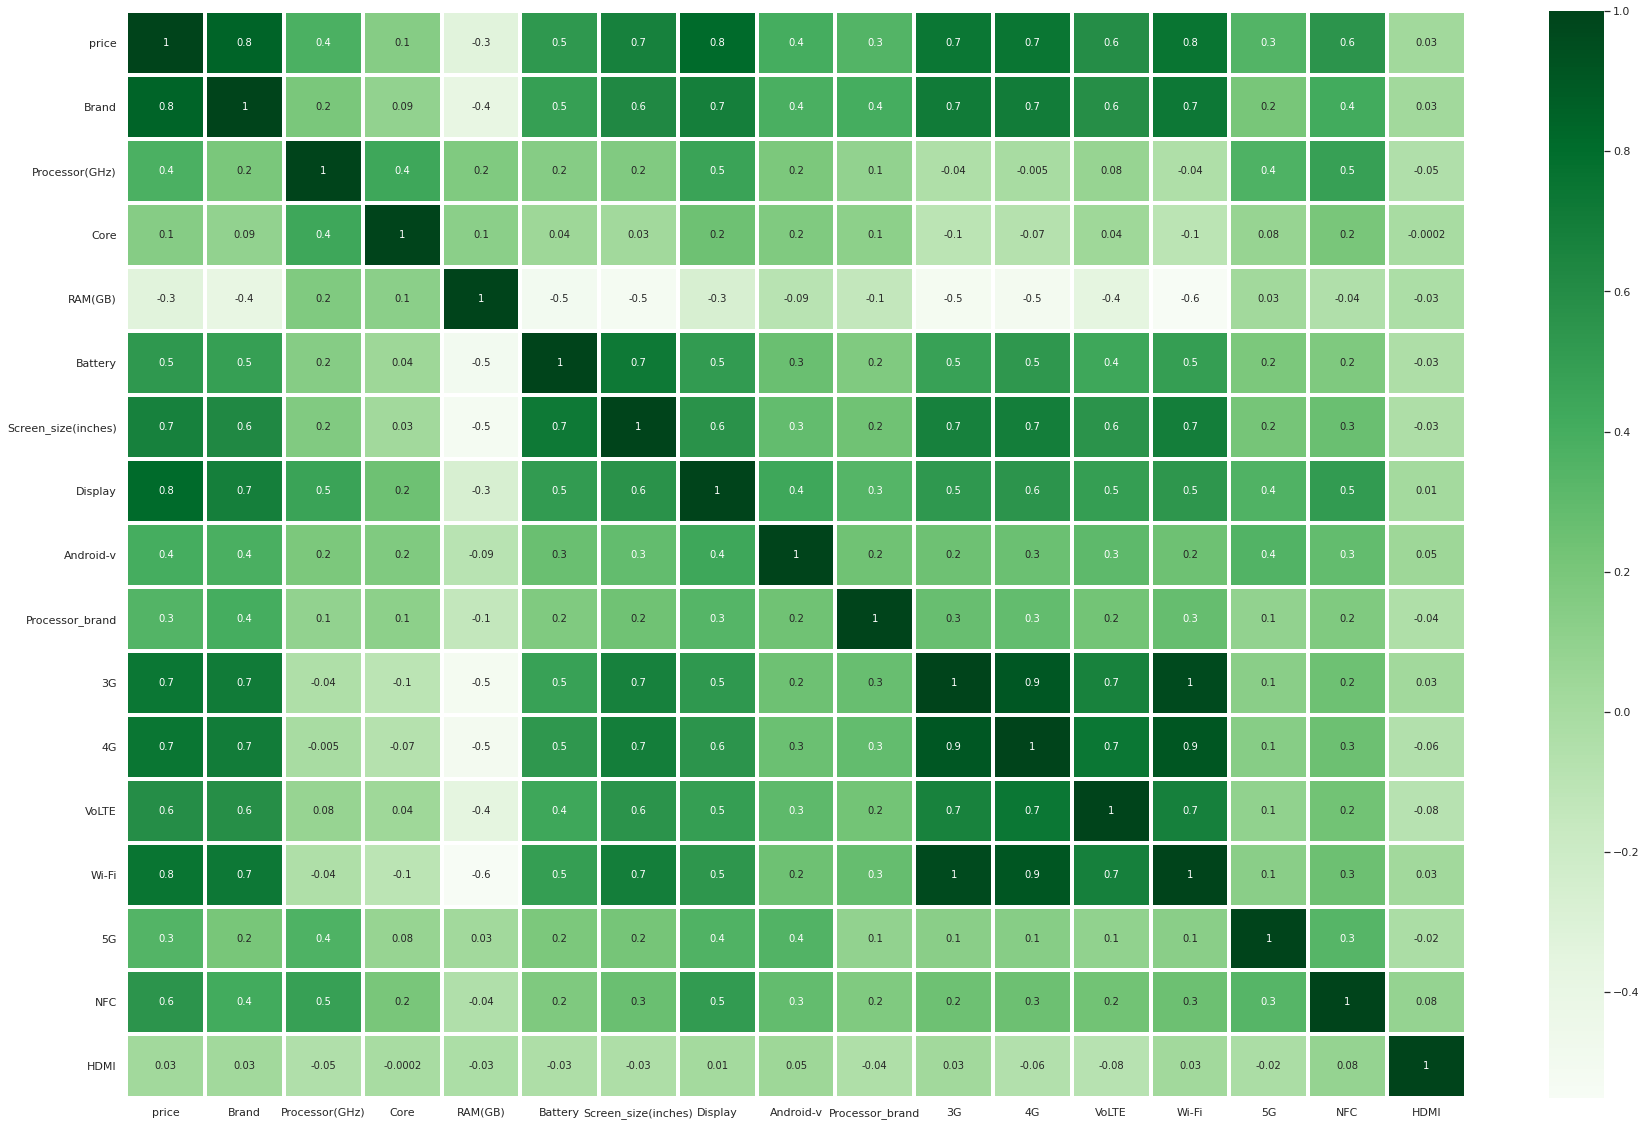

In [0]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'})
%matplotlib inline 

plt.figure(figsize=(30,20))
cmap = sns.cm.rocket_r
sns.heatmap(train_data[['price', 'Brand', 'Processor(GHz)', 'Core', 'RAM(GB)', 'Battery', 'Screen_size(inches)',
       'Display', 'Android-v', 'Processor_brand', '3G', '4G', 'VoLTE', 'Wi-Fi', '5G', 'NFC', 'HDMI']].corr(), annot=True , linewidths=3 , fmt='.1g' , cmap="Greens" )
plt.show()

In [0]:
train_data_f = train_data.drop(['price'],axis=1)
Pricing = train_data['price']

**Creating Train and validation dataset**

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data_f,Pricing,test_size=.05)

In [0]:
# lasso
feature_sel_model = SelectFromModel(Lasso(alpha=0.0001, random_state=0)) 
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.0001, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [0]:
feature_sel_model.get_support()


array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
       False,  True,  True, False,  True, False])

**Selected features**

In [0]:
selected_feat = x_train.columns[(feature_sel_model.get_support())]
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 33
selected features: 25


In [0]:
selected_feat

Index(['score-val', 'rating', 'Brand', 'Processor(GHz)', 'Processor',
       'RAM(GB)', 'Memory(GB)', 'Battery', 'Screen_size(inches)', 'Display',
       'Memory_card_supported', 'Android-v', 'Processor_brand', 'Front_cam_1',
       'Dual Sim', '3G', '4G', 'VoLTE', 'Wi-Fi', 'IR Blaster', '5G', 'NFC',
       'Quad_cam', 'Single_cam', 'Dual_cam'],
      dtype='object')

**Using the same selected feature in test dataset also**

In [0]:
x_train=x_train[selected_feat]
x_test  =x_test[selected_feat]

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score as cvs

# **Model selection**

**Linear Regression model**

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:

Linear_model = LinearRegression()
Linear_model.fit(x_train, y_train)
y_predict=Linear_model.predict(x_test)
abs(y_predict-y_test).mean()

0.03166023622828674

**Ploting Distribution of predicted vs Expected .** 

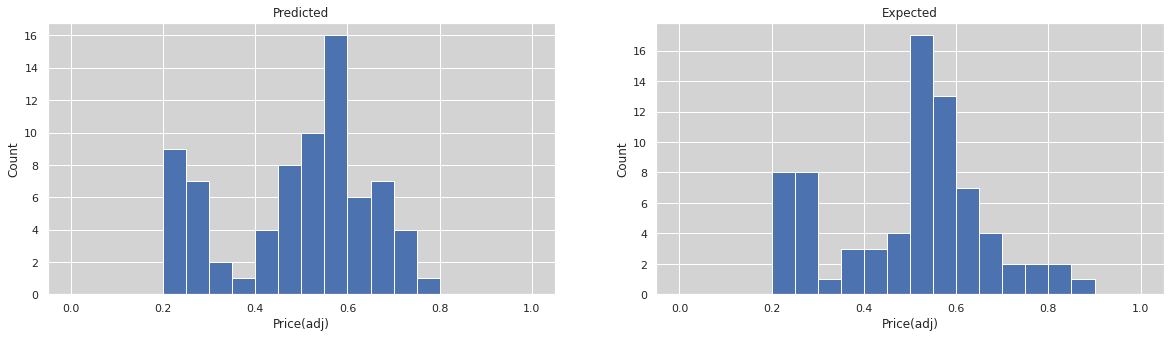

In [0]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
ax1.hist(y_predict , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax2.hist(y_test , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax1.set_title('Predicted')
ax2.set_title('Expected')
ax1.set_xlabel('Price(adj)')
ax2.set_xlabel('Price(adj)')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')
plt.show()

**Random forest** 

In [0]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor.fit(x_train,y_train)   
RFR_pred = regressor.predict(x_test)

In [0]:
abs(RFR_pred-y_test).mean()

0.02301749522374137

**Hyper parameter tuning**

In [0]:
from sklearn.model_selection import GridSearchCV
clf =GridSearchCV(RandomForestRegressor(random_state = 0) ,{
    'n_estimators':[200,100,50]
}, scoring='neg_mean_squared_error',cv=2,return_train_score=False)



clf.fit(x_train,y_train)   
RFR_pred_grid = clf.predict(x_test)

In [0]:
output = pd.DataFrame(clf.cv_results_)
output

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.933985,0.006705,0.035179,0.000456,200,{'n_estimators': 200},-0.001569,-0.001186,-0.001377,0.000192,1
1,0.462122,0.001106,0.018403,0.000119,100,{'n_estimators': 100},-0.001594,-0.001204,-0.001399,0.000195,2
2,0.234392,0.001037,0.009920,0.000027,50,{'n_estimators': 50},-0.001619,-0.001238,-0.001429,0.000191,3


**Absolute mean difference is better than linear regression.**

In [0]:
abs(RFR_pred_grid-y_test).mean()

0.02345229925025348

**Ploting Distribution of predicted vs Expected on validation datset.** 

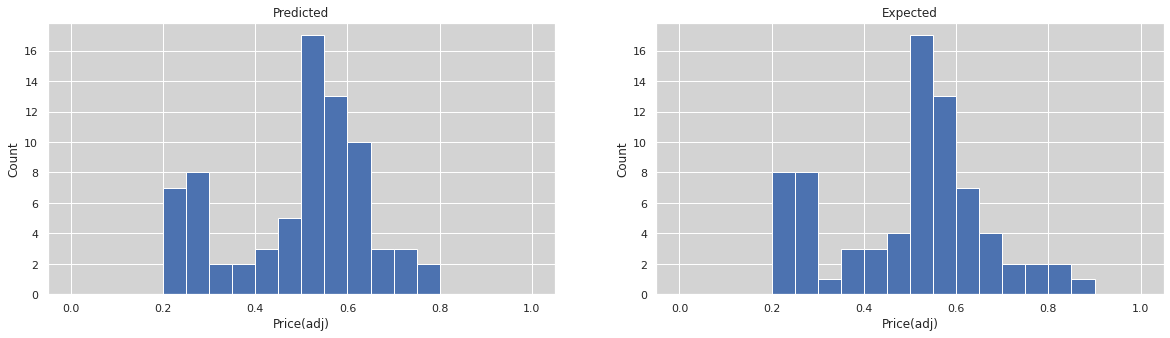

In [0]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
ax1.hist(RFR_pred_grid , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax2.hist(y_test , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax1.set_title('Predicted')
ax2.set_title('Expected')
ax1.set_xlabel('Price(adj)')
ax2.set_xlabel('Price(adj)')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')
plt.show()

**XGB boost**

In [0]:
from xgboost import XGBRegressor
xgb_model=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.02,
             eval_metric='mae', gamma=0, importance_type='gain',
             learning_rate=0.05, max_delta_step=0, max_depth=50,
             min_child_weight=3, missing=None, n_estimators=200, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

eval_set = [(x_train, y_train), (x_test, y_test)]
xgb_model.fit(x_train,y_train , eval_set=eval_set ,verbose=False , eval_metric='mae',early_stopping_rounds=10 )

[08:01:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.02,
             eval_metric='mae', gamma=0, importance_type='gain',
             learning_rate=0.05, max_delta_step=0, max_depth=50,
             min_child_weight=3, missing=None, n_estimators=200, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [0]:
y=xgb_model.predict(x_train)

**MAE on train dataset**

In [0]:
abs(y-y_train).mean()

0.004226443638301718

In [0]:
y_predict=xgb_model.predict(x_test)

**MAE on validation dataset**

In [0]:
abs(y_predict-y_test).mean()

0.0239099947991136

**Ploting Distribution of predicted vs Expected on train datset.** 

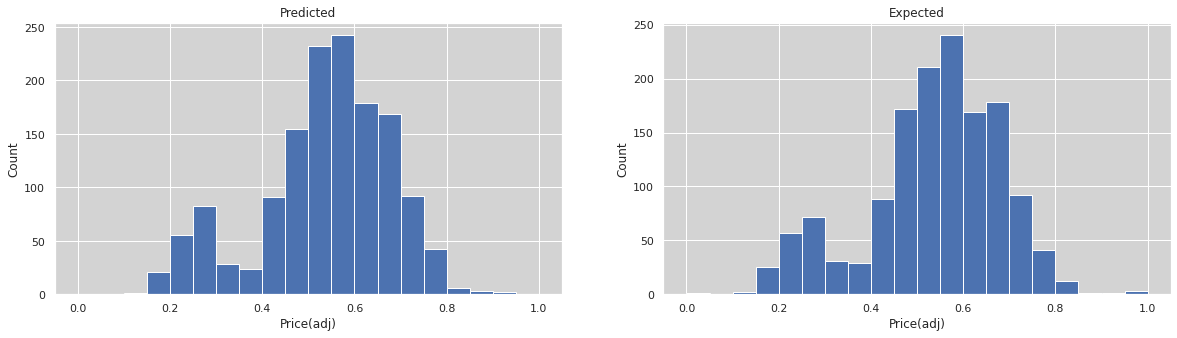

In [0]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
ax1.hist(y , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax2.hist(y_train , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax1.set_title('Predicted')
ax2.set_title('Expected')
ax1.set_xlabel('Price(adj)')
ax2.set_xlabel('Price(adj)')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')
plt.show()

**Ploting Distribution of predicted vs Expected on validation datset.** 

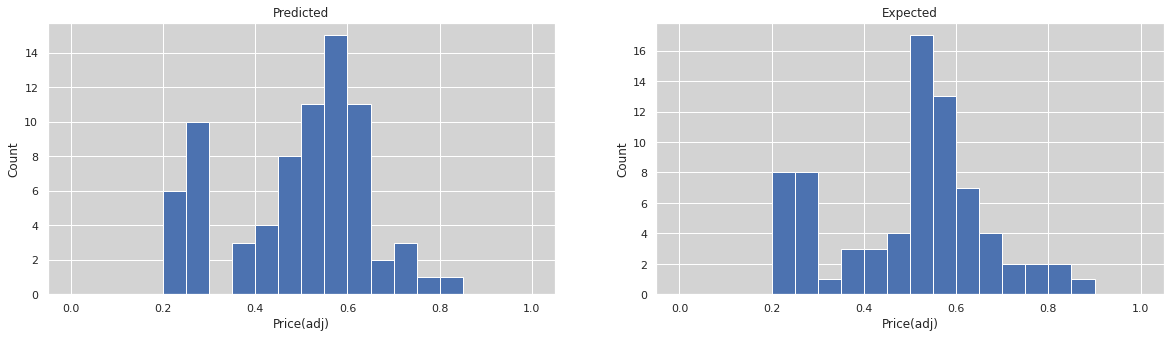

In [0]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
ax1.hist(y_predict , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax2.hist(y_test , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax1.set_title('Predicted')
ax2.set_title('Expected')
ax1.set_xlabel('Price(adj)')
ax2.set_xlabel('Price(adj)')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')
plt.show()

In [0]:
from matplotlib import pyplot

In [0]:
results = xgb_model.evals_result()
epochs = len(results['validation_0']['mae'])
x_axis = range(0, epochs)

**Plotting learning curve.**

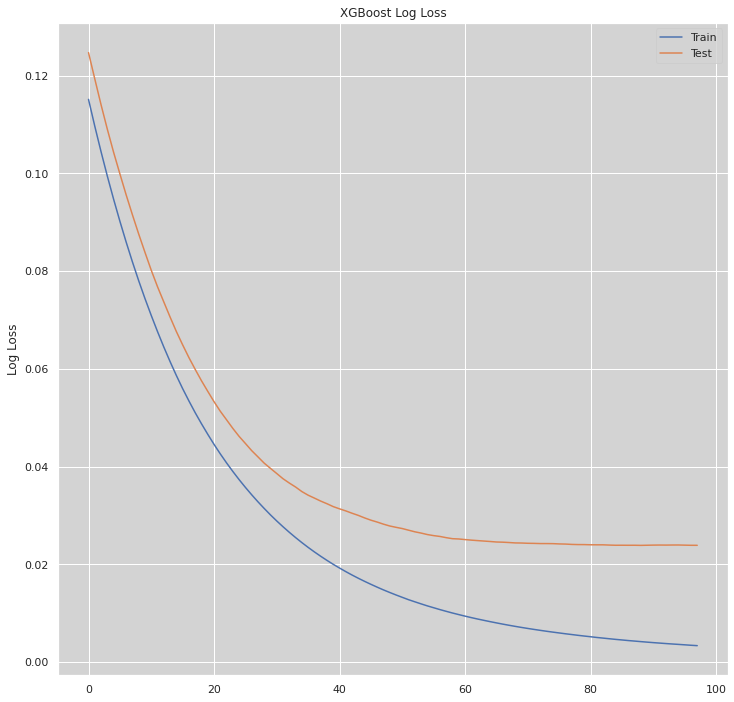

In [0]:
fig, ax = pyplot.subplots(figsize=(12,12))
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

**Hyper parameter tuning XGBboost**

In [0]:
params={
 "learning_rate"    :[0.01],
 "max_depth"        :[ 40 , 60 ,70 , 80 ,90 ,100 ,110 ,200],
  "n_estimators"    :[100, 200, 250, 300, 400],
  "early_stopping_rounds":[10], 
  "eval_metric" : ["mae"], 
  "eval_set" : [[x_test, y_test]]
}

In [0]:
classifier = XGBRegressor()

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
xgb_clf=GridSearchCV(classifier, params, verbose=1,             
         cv=TimeSeriesSplit(n_splits=5).get_n_splits([x_train, y_train]))

**Preparing TEST dataset for testing.**

In [0]:
test_data.drop(['Unnamed: 0','name','pid'],inplace=True,axis=1)
test_data = pd.DataFrame(scaler.transform(test_data[feature_scale]), columns=feature_scale)
test_data_f = test_data.drop(['price'],axis=1)
test_data = test_data[selected_feat]



/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
test_data_f=test_data_f[selected_feat]

In [0]:
xgb_clf.fit(x_train,y_train)   

In [0]:
xgb_clf.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
             eval_metric='mae',
             eval_set=[      score-val  rating     Brand  ...  Quad_cam  Single_cam  Dual_cam
741    0.066667   0.525  0.192982  ...  0.000000    0.120370  0.000000
587    0.622222   0.775  0.397661  ...  0.000000    0.000000  0.203125
938    0.655556   0.550  0.918129  ...  0.000000    0.111111...
1244    0.266363
885     0.513077
1460    0.509885
443     0.545810
Name: price, dtype: float64],
             gamma=0, importance_type='gain', learning_rate=0.01,
             max_delta_step=0, max_depth=40, min_child_weight=1, missing=None,
             n_estimators=400, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [0]:
y_predict =xgb_clf.predict(x_train)

In [0]:
y_predict_test =  xgb_clf.predict(x_test)

In [0]:
abs(y_predict_test-y_test).mean()

0.023545319977602754

In [0]:
y_predict_best =  xgb_clf.predict(test_data_f)

In [0]:
r=data['price'][:1500].max()-data['price'][:1500].min()
r

8.789607791737229

**MAE on test dataset.**

In [0]:
abs(y_predict_best-(data['price'][1500:]-data['price'][:1500:].min())/r).mean()

0.024178269619003087

**Expected MAE if model doens't work.**

In [0]:
abs(y_test.mean()-y_test).mean()

0.13000608482795648

**predicted data distribution on validation data vs actual result on validation data.**

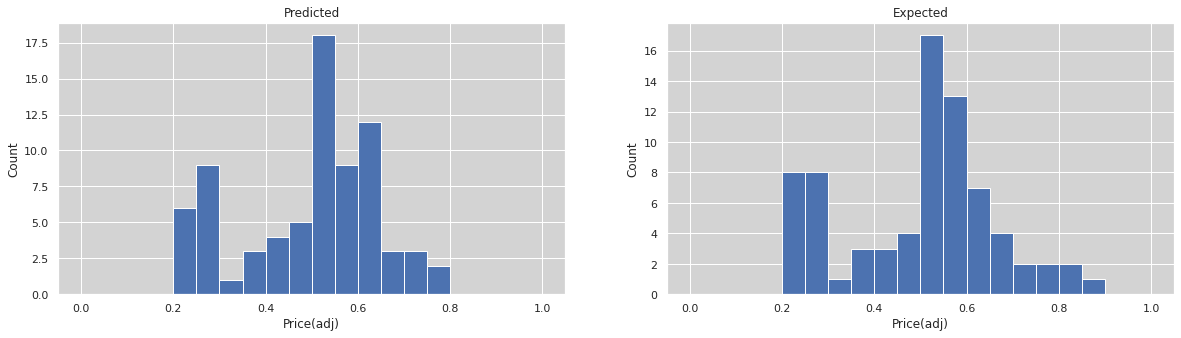

In [0]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
ax1.hist(y_predict_test , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax2.hist(y_test , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax1.set_title('Predicted')
ax2.set_title('Expected')
ax1.set_xlabel('Price(adj)')
ax2.set_xlabel('Price(adj)')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')
plt.show()

**predicted of data distribution on seperate test data vs actual result on test data.**

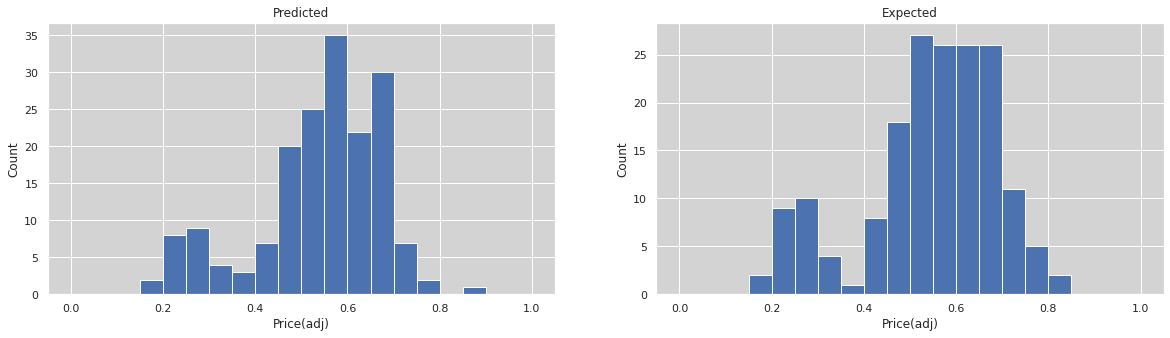

In [0]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
ax1.hist(y_predict_best , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax2.hist((data['price'][1500:]-data['price'][:1500:].min())/r , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax1.set_title('Predicted')
ax2.set_title('Expected')
ax1.set_xlabel('Price(adj)')
ax2.set_xlabel('Price(adj)')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')
plt.show()

In [0]:
y_predict = y_predict_best

In [0]:
y_predict = y_predict*(r)+data['price'][1500:].min()
y_predict[:5]

array([ 9.957771, 11.59631 ,  7.791664,  8.374231, 10.521994],
      dtype=float32)

**Correlation between prediction and result indicates how good the model is working.**

In [0]:
orig_df[['predict','price']].corr()

,predict,price
predict,1.000000,0.973957
price,0.973957,1.000000


In [0]:
orig_df['predict']=y_predict
orig_df

,pid,price,predict
1500,pd1f0p40yab,9.209340,9.957771
1501,pd10fvlv1rp,10.596385,11.596310
1502,pd1fkv196pu,6.445720,7.791664
1503,pd1x4weiur8,7.214504,8.374231
1504,pd15cfwrcy1,9.392579,10.521994
1505,pd1a0rqz601,6.683361,8.059963
1506,pd154cay61j,10.373460,11.804543
1507,pd1btzu6xpr,9.210240,10.218747
1508,1101394rgz7,8.824531,10.518459
1509,pd1yc223ciw,10.165813,11.625772


In [0]:
diff_error=orig_df['predict'].mean()-orig_df['price'].mean()
diff_error

1.3459166416065003

**Reducing some shift introduced during rescaling.**

In [0]:
orig_df['predict']=y_predict-diff_error
orig_df

,pid,price,predict
1500,pd1f0p40yab,9.209340,8.611855
1501,pd10fvlv1rp,10.596385,10.250393
1502,pd1fkv196pu,6.445720,6.445747
1503,pd1x4weiur8,7.214504,7.028315
1504,pd15cfwrcy1,9.392579,9.176077
1505,pd1a0rqz601,6.683361,6.714046
1506,pd154cay61j,10.373460,10.458627
1507,pd1btzu6xpr,9.210240,8.872830
1508,1101394rgz7,8.824531,9.172543
1509,pd1yc223ciw,10.165813,10.279856


In [0]:
abs(orig_df['price']-orig_df['predict']).mean()

0.21215662115152553

In [0]:
abs(orig_df['price'].mean()-orig_df['price']).mean()

1.0003048379280124

**Resacling to original scale.**

In [0]:
final_df = np.expm1(orig_df[['price','predict']])
final_df

,price,predict
1500,9989.0,5495.432658
1501,39989.0,28292.656705
1502,629.0,629.017361
1503,1358.0,1127.127650
1504,11998.0,9662.168631
1505,798.0,822.897788
1506,31998.0,34842.669408
1507,9998.0,7134.448527
1508,6798.0,9628.076212
1509,25998.0,29138.669216


**MAE between predicted price and actual price.**

In [0]:
abs(final_df['price']-final_df['predict']).mean()

4746.949819908891